In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order
from TDD.TDD_Q import cir_2_tn,add_trace_line,add_inputs,add_outputs
#get_real_qubit_num
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator

In [2]:
input_s=[]
output_s=[]
input_s=[0]
#input_s=[random.randint(0,1) for k in range(n)]
#output_s=[0]*n
# output_s=[random.randint(0,1) for k in range(n)]

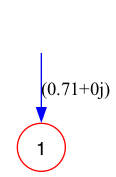

In [3]:
Ini_TDD(['x0','y0','x1','y1'])
U=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
u2=np.array([[1,0],[0,1]])
var=[Index('x0'),Index('y0')]
var2=[Index('y0'),Index('x1')]
ts1=Tensor(U,var)
print(ts1)
ts2=Tensor(U,var2)
ts3=Tensor(u2,var2)
tn=TensorNetwork([ts1,ts2])
tn2=TensorNetwork([ts1,ts3])
if input_s:
    add_inputs(tn2,input_s,1)
if output_s:
    add_outputs(tn2,output_s,1)
tn.cont().show()
tn2.cont().show()

In [29]:
path='Benchmarks/'
file_name="QFT_10.qasm"
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs=cir_2_tn(cir)
n=cir.num_qubits
input_s=[]
output_s=[]
#input_s=[0]*n
#input_s=[random.randint(0,1) for k in range(n)]
#output_s=[1]*(n-2)
#output_s.append(0)
#output_s.append(0)
print(output_s)
# output_s=[random.randint(0,1) for k in range(n)]
if input_s:
    add_inputs(tn,input_s,n)
if output_s:
    add_outputs(tn,output_s,n)
# add_trace_line(tn,n)

[]


0.06290793418884277


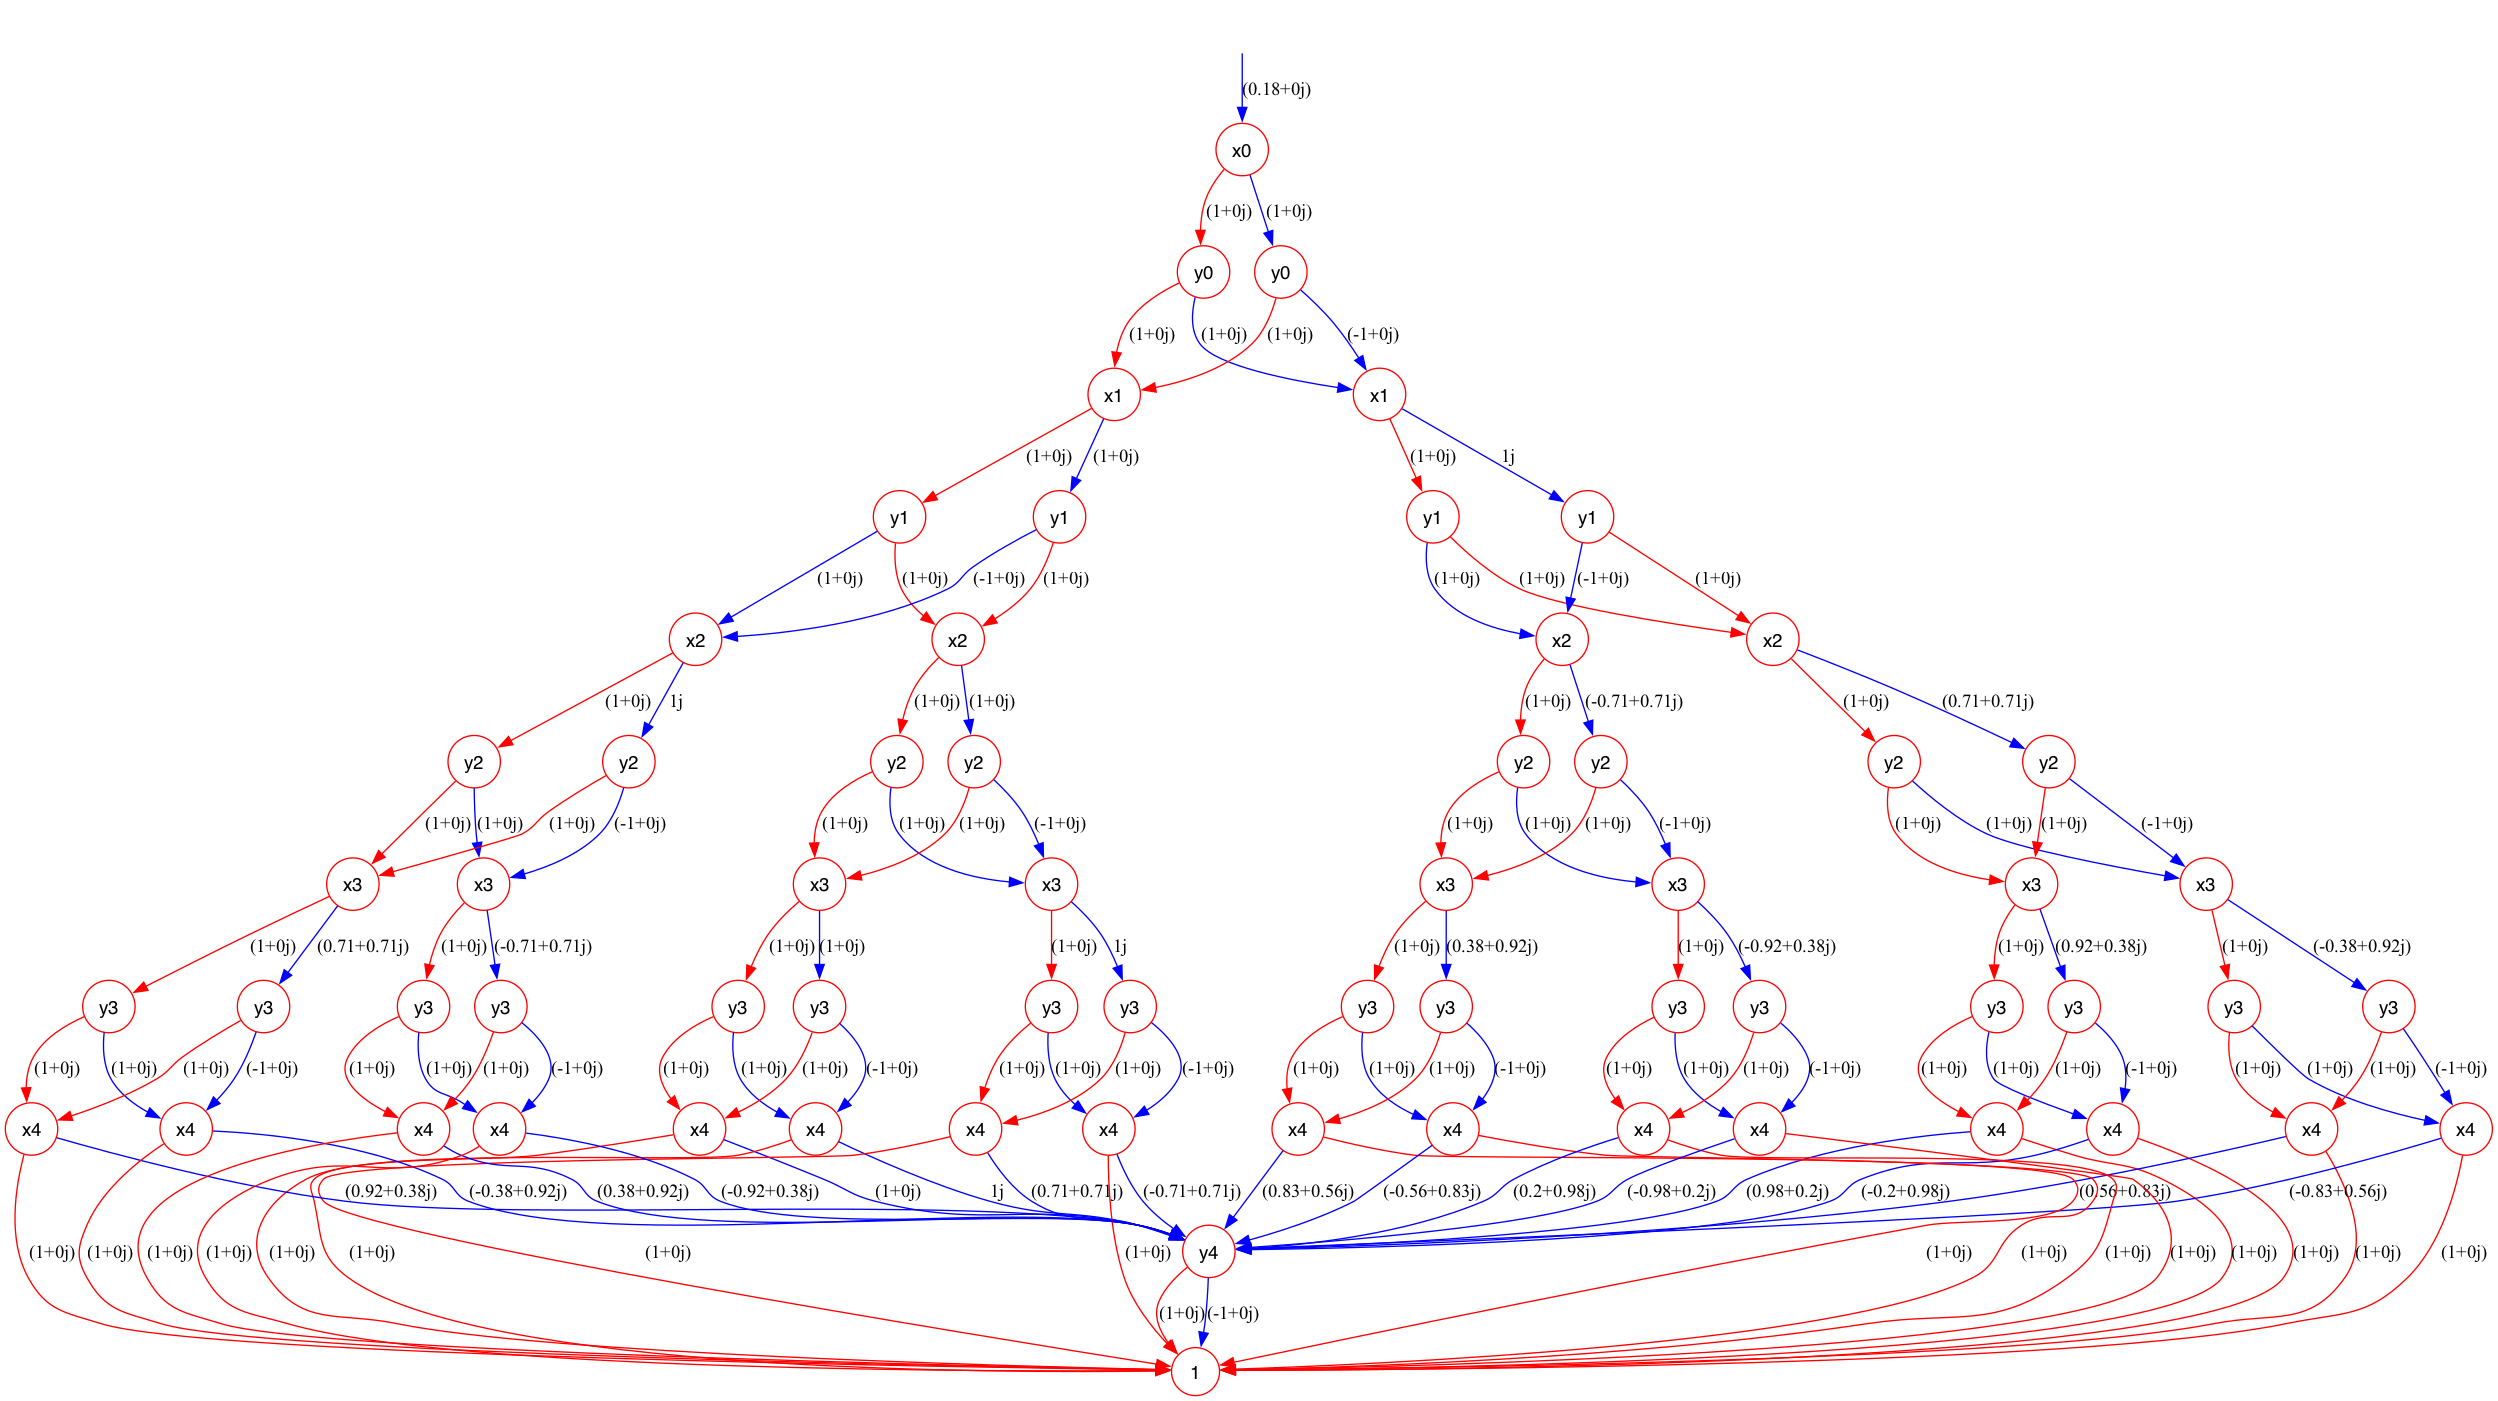

In [12]:
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont(optimizer='tree_decomposition')
print(time.time()-t_start)
tdd.show()

In [26]:
def count_cnot_gates(circuit):
    # Count the number of 2-qubit CNOT gates
    num_cnot_gates = 0
    for instr, _, _ in circuit.data:
        print(instr)
        if instr.num_qubits == 2:
            num_cnot_gates +=1
    return num_cnot_gates

In [31]:
backend = AerSimulator(method='statevector')
cir20=QuantumCircuit.from_qasm_file(path+file_name)
cir20.save_statevector(label="my_sv")
qc=transpile(cir20,backend=backend)
job=backend.run(cir20)
result=job.result()
cir20.num_qubits
print(count_cnot_gates(qc))

Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[1.5707963267948966])
Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.7853981633974483])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[1.5707963267948966])
Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.39269908169872414])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.7853981633974483])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[1.5707963267948966])
Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.19634954084936207])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.39269908169872414])
Instruction(name='cu1', num_qubits=2, num_clbits=0, params=[0.7853981633974483])
Instruction(name='cu1', 

In [7]:
np.log2(18446744073709551615)

64.0

In [8]:
file_name="qft_20.qasm"
cir2=QuantumCircuit.from_qasm_file(path+file_name)
#cir2.draw()
#tn2,all_indexs2=cir_2_tn(cir2)
#set_index_order(all_indexs2)
#tdd2=tn2.cont(optimizer='tree_decomposition')
#print(tdd==tdd2)
#tdd2.show()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


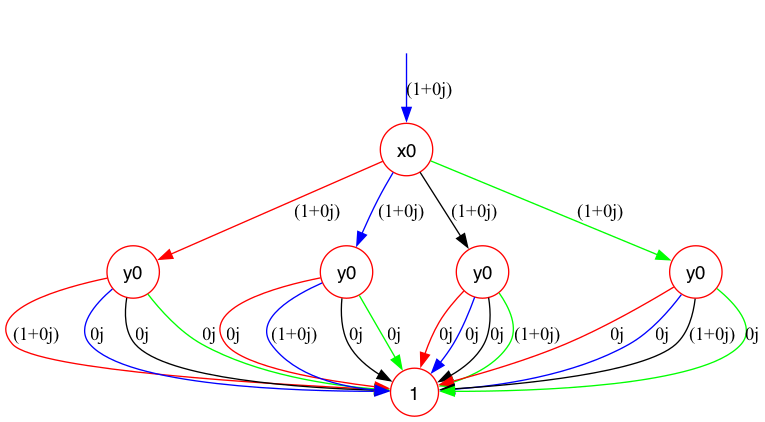

In [9]:
Ini_TDD(['x0','y0','x1','y1'])
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(U,var)
tdd1=ts1.tdd()
print(tdd1.to_array())
tdd1.show()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


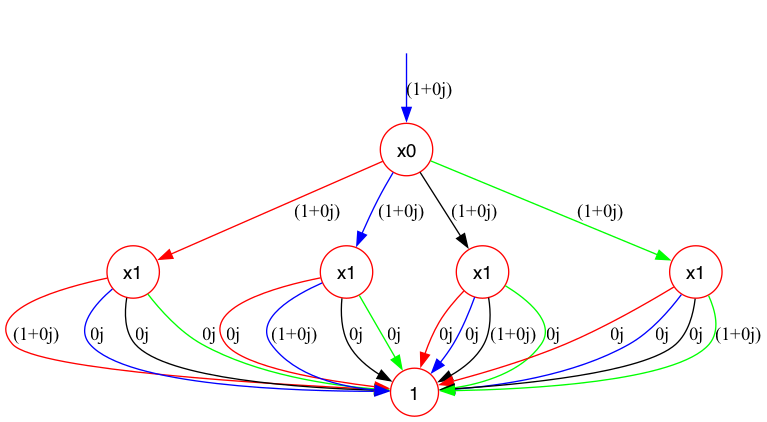

In [10]:
var2=[Index('y0'),Index('x1')]
ts2=Tensor(U,var2)
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
print(tdd.to_array())
tdd.show()